<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_09_MatricesAutovaloresAutovectores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import torch as pt
import sympy as sp
import matplotlib.pyplot as plt
import scipy as sc
from scipy import optimize

# Autovalores, autovectores, diagonalización

Una matriz es diagonalizable cuando es semejante a una matriz diagonal. Esto significa que mediante un cambio de base, podemos reducir la matriz original a una forma diagonal. Para que una matriz sea diagonalizable, debe cumplir las siguientes condiciones:

**Autovectores linealmente independientes**: Una matriz $(A \in \mathbb{R}^{n \times n})$ es diagonalizable si y solo si tiene (n) autovectores linealmente independientes. Esto significa que los autovectores asociados a los autovalores deben ser linealmente independientes.

**Semejanza**: Existe una matriz invertible (P) tal que ($P^{-1}AP = D$), donde (D) es una matriz diagonal formada por los autovalores de (A).

La diagonalización es un proceso que transforma una matriz cuadrada ( A ) en una matriz diagonal ( D ) mediante una matriz invertible ( P ), tal que:

$P^{-1}AP = D$

La matriz diagonal ( D ) contiene los autovalores de ( A ) en la diagonal principal, y las columnas de ( P ) son los autovectores correspondientes a esos autovalores.

## Numpy

In [7]:
# Definir una matriz 3x3
A = np.array([[4, 2, 0],
              [2, 4, 1],
              [0, 1, 3]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
U = autovectores.copy()
print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)


Autovalores: [6.164248 1.608618 3.227134]
Autovectores:
 [[-0.661115  0.561818 -0.497279]
 [-0.715409 -0.671761  0.192165]
 [-0.226091  0.482801  0.846041]]


In [8]:
lambda_1, lambda_2, lambda_3 = sp.symbols('lambda_1 lambda_2 lambda_3')
x1, x2, x3 = sp.symbols('x1 x2 x3')

A = sp.Matrix([[4, 2, 0],
               [2, 4, 1],
               [0, 1, 3]])

A_minus_lambda_I = A - sp.diag(lambda_1, lambda_2, lambda_3)
A_minus_lambda_I

Matrix([
[4 - lambda_1,            2,            0],
[           2, 4 - lambda_2,            1],
[           0,            1, 3 - lambda_3]])

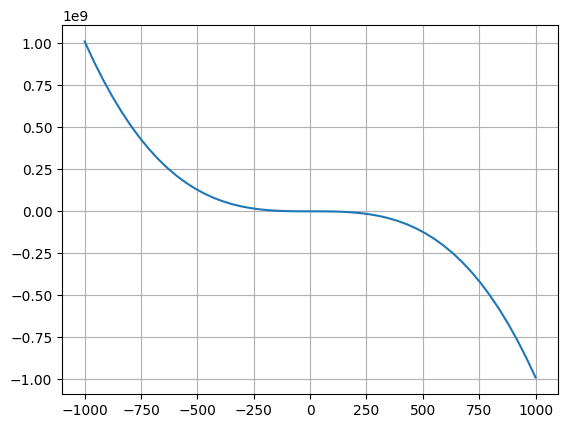

In [9]:
x=np.linspace(-1000,1000)
p=lambda x: -x**3 +11*x**2 -35*x+32 #Polinomio caracteristico
plt.plot(x,p(x))
plt.grid()

In [11]:
b=sc.optimize.newton(p,0)
a=sc.optimize.newton(p,500)
c=sc.optimize.newton(p,3)
a,b,c


(6.164247938460209, 1.6086176193690995, 3.2271344421706747)

In [12]:
#ESTO NO
import numpy as np


A1 = np.array([[4-a, 2, 0],
               [2, 4-a, 1],
               [0, 1, 3-a]])

A2 = np.array([[4-b, 2, 0],
               [2, 4-b, 1],
               [0, 1, 3-b]])

A3 = np.array([[4-c, 2, 0],
               [2, 4-c, 1],
               [0, 1, 3-c]])

autovalores_A1, autovectores_A1 = np.linalg.eig(A1)
autovalores_A2, autovectores_A2 = np.linalg.eig(A2)
autovalores_A3, autovectores_A3 = np.linalg.eig(A3)

print("Autovectores para A1:")
print(autovectores_A1)
print("\nAutovectores para A2:")
print(autovectores_A2)
print("\nAutovectores para A3:")
print(autovectores_A3)


Autovectores para A1:
[[-0.661115  0.561818 -0.497279]
 [-0.715409 -0.671761  0.192165]
 [-0.226091  0.482801  0.846041]]

Autovectores para A2:
[[-0.661115  0.561818 -0.497279]
 [-0.715409 -0.671761  0.192165]
 [-0.226091  0.482801  0.846041]]

Autovectores para A3:
[[-0.661115  0.561818 -0.497279]
 [-0.715409 -0.671761  0.192165]
 [-0.226091  0.482801  0.846041]]


In [13]:
A1 = sp.Matrix([[4-a, 2., 0],
              [2, 4-a, 1],
              [0, 1, 3-a]])

A2 = sp.Matrix([[4-b, 2, 0],
              [2, 4-b, 1],
              [0, 1, 3-b]])
A3= sp.Matrix([[4-c, 2, 0],
              [2, 4-c, 1],
              [0, 1, 3-c]])
x=sp.Symbol("x")
y=sp.Symbol("y")
z=sp.Symbol("z")
vect=sp.Matrix([x,y,z])

C=A1*vect
C, "    " , sp.solve(C)


(Matrix([
 [ -2.16424793846021*x + 2.0*y],
 [2*x - 2.16424793846021*y + z],
 [      y - 3.16424793846021*z]]),
 '    ',
 {x: 0.0, y: 0.0, z: 0.0})

### Matriz Diagonal

In [24]:
D = np.linalg.inv(U)@A@U
np.set_printoptions(suppress=True, precision=6)
D

Matrix([
[     6.16424793846021,  9.99200722162641e-16, -6.66133814775094e-16],
[-2.77555756156289e-17,       1.6086176193691, -5.55111512312578e-16],
[ 2.22044604925031e-16, -2.22044604925031e-16,      3.22713444217069]])

In [25]:
np.set_printoptions(suppress=True, precision=6)


## Actividad:

Construir un programa que permita elevar una matriz a una potencia.


La exponencial de una matriz ( $e^A$) se define como la serie de Taylor de la función exponencial evaluada en la matriz ( A ):


\begin{equation}
e^A = I + A + \frac{1}{2!}A^2 + \frac{1}{3!}A^3 + \cdots = \sum_{n=0}^{\infty} \frac{1}{n!}A^n
\end{equation}


Donde ( $e^D$ ) es simplemente la matriz exponencial de la matriz diagonal ( D ), que es fácil de calcular porque solo implica elevar los autovalores de (A) a la potencia de (e):



\begin{equation}
e^A = Pe^DP^{-1}
\end{equation}


Exponencial de una matriz diagonal

\begin{equation}
e^D = \begin{bmatrix}
e^{\lambda_1} & 0 & \cdots & 0 \\
0 & e^{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & e^{\lambda_n}
\end{bmatrix}
\end{equation}




In [32]:
import numpy as np

def matrix_exp(matrix, num_terms=1000):
    exp_matrix = np.eye(matrix.shape[0])
    power_matrix = np.eye(matrix.shape[0])
    for n in range(1, num_terms):
        power_matrix = np.dot(power_matrix, matrix) / n
        exp_matrix += power_matrix
    return exp_matrix
A = np.array([[4, 2, 0],
              [2, 4, 1],
              [0, 1, 3]])
exp_A = matrix_exp(A)
print("Exponencial de la matriz A:")
print(exp_A)

Exponencial de la matriz A:
[[215.613982 220.575     61.815562]
 [220.575    246.521763  79.379719]
 [ 61.815562  79.379719  43.51092 ]]


In [33]:
from scipy.linalg import expm
A = np.array([[4, 2, 0],
              [2, 4, 1],
              [0, 1, 3]])
exp_A2 = expm(A)
exp_A2

array([[215.613982, 220.575   ,  61.815562],
       [220.575   , 246.521763,  79.379719],
       [ 61.815562,  79.379719,  43.51092 ]])

# Autovalores y autovectores complejos

In [34]:
theta=-np.pi/4
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
U = autovectores.copy()
print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)

D = np.linalg.inv(U)@A@U
np.set_printoptions(suppress=True, precision=6)
D

Autovalores: [0.707107+0.707107j 0.707107-0.707107j]
Autovectores:
 [[0.707107+0.j       0.707107-0.j      ]
 [0.      +0.707107j 0.      -0.707107j]]


array([[0.707107+0.707107j, 0.      +0.j      ],
       [0.      +0.j      , 0.707107-0.707107j]])

In [35]:
np.exp(D)

array([[1.541863+1.317538j, 1.      +0.j      ],
       [1.      +0.j      , 1.541863-1.317538j]])

Actividad 2.

Considere la ecuación cuadrática $x^2-4xy+3y^2=6$, esta ecuación cuadrática se corresponde a una hiperbola, la cual puede ser escrita en forma matricial como sigue:

$A\vec{v} \cdot \vec{v}=6$, donde $\vec{v}=(x, y)$ y A es una matrix simetrica,

\begin{equation}
A=\begin{bmatrix}
1 & -2 \\
-2 & 3 \\
\end{bmatrix}
\end{equation}

1. Realice un grafico que represente la hyperbola







- Diagonalice A, para ello construya la matrix Q de autovectores ortoganales
tal que $D=Q^{T}AQ$, en este caso se dice que A es diagonalizable ortogonalmente, donde $A=QDQ^T$.

- Aplique el resultado de la siguiente demostración para encontrar una nueva hyperbola en una  nueva base

\begin{equation}
QDQ^T \vec{v} \cdot \vec{v} = d
\end{equation}


\begin{equation}
Q(DQ^T\vec{v}) \cdot \vec{v} = (DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


\begin{equation}
(DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


Sea $u=Q^T\vec{v}$

Luego :


\begin{equation}
(D\vec{u}) \cdot \vec{u}=d
\end{equation}

donde $\vec{u}=(x', y')$, tal que $D\vec{u} \cdot \vec{u}=d$ es una nueva hyperbola









In [36]:
from scipy.linalg import sqrtm

In [37]:

A = np.array([[1, -2],
              [-2, 3]])

def hiperbola(x, y):
    return x**2 - 4*x*y + 3*y**2 - 6


https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html

In [38]:

x_ = np.linspace(-10, 10, 400)
y_ = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_, y_)
Z = hiperbola(X, Y)


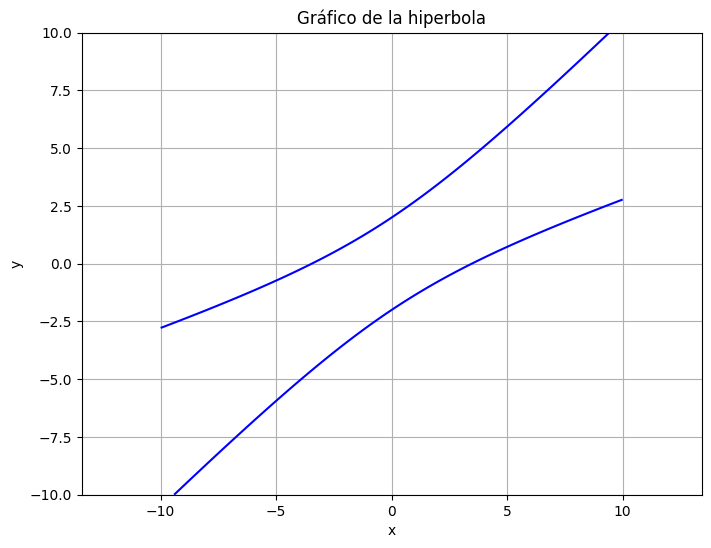

In [39]:

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=[6], colors='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de la hiperbola')
plt.grid(True)
plt.axis('equal')
plt.show()


### Sympy

In [40]:
from sympy import Matrix, simplify

# Definir una matriz 3x3
A = Matrix([[4, 2, 0],
            [2, 4, 1],
            [0, 1, 3]])

# Calcular autovalores y autovectores
autovalores = A.eigenvals()
autovectores = A.eigenvects()

# Simplificar autovalores y autovectores
autovalores_simplificados = {simplify(l): m for l, m in autovalores.items()}
autovectores_simplificados = [(simplify(l), m, [simplify(v) for v in vs]) for l, m, vs in autovectores]

print("Autovalores simplificados:", autovalores_simplificados)
print("Autovectores simplificados:\n", autovectores_simplificados)


Autovalores simplificados: {11/3 + 16*2**(1/3)/(3*(61 + 3*sqrt(1407)*I)**(1/3)) + 2**(2/3)*(61 + 3*sqrt(1407)*I)**(1/3)/6: 1, (-128*2**(1/3) + (1 - sqrt(3)*I)*(44 + 2**(2/3)*(-1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 - sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1, (-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1}
Autovectores simplificados:
 [((-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)), 1, [Matrix([
[(12*(-176 + 7*2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(1 + sqrt(3)*I)**2*(61 + 3*sqrt(1407)*I) + (61 + 3*sqrt(1407)*I)**(1/3)*(128*2**(1/3) + (-44 + 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))**2 + 10752*2**(1/3)*(1 + sqrt(3)

In [41]:
autovalores_simplificados

{11/3 + 16*2**(1/3)/(3*(61 + 3*sqrt(1407)*I)**(1/3)) + 2**(2/3)*(61 + 3*sqrt(1407)*I)**(1/3)/6: 1,
 (-128*2**(1/3) + (1 - sqrt(3)*I)*(44 + 2**(2/3)*(-1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 - sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1,
 (-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1}

# Pytorch

Definción de una matrix de tres formas:
Hasta ahora sabemos definir matrices como objetos de numpy y objetos de sympy, en la actualidad, el rápido crecimiento de las unidades de procesamiento gráfico GPU,  permite definir otro tipo de objetos que pueden acelerar el computo computacional.


- Como objeto de numpy
- Como objeto de sympy
- Como objeto de pytorch


La velocidad de ejecución entre PyTorch y Numpy puede variar dependiendo del tamaño de los datos y si se está utilizando o no la aceleración por GPU. Para operaciones con matrices pequeñas y cálculos que no requieren de la paralelización de una GPU, Numpy puede ser más rápido porque opera directamente en la CPU y la memoria principal. Sin embargo, para matrices grandes y operaciones que pueden ser paralelizadas, PyTorch con soporte de GPU puede ser significativamente más rápido.

Comparativa de comandos de ejecución entre pytorch, numpy  y sympy


| Operación | PyTorch | Numpy | SymPy |
|-----------|---------|-------|-------|
| Creación de una matriz | `torch.tensor([[1, 2], [3, 4]])` | `np.array([[1, 2], [3, 4]])` | `Matrix([[1, 2], [3, 4]])` |
| Transposición de una matriz | `torch.transpose(A, 0, 1)` | `A.T` o `np.transpose(A)` | `A.T` |
| Multiplicación de matrices | `torch.matmul(A, B)` | `np.dot(A, B)` o `A @ B` | `A * B` |
| Inversa de una matriz | `torch.inverse(A)` | `np.linalg.inv(A)` | `A**-1` |
| Determinante de una matriz | `torch.det(A)` | `np.linalg.det(A)` | `A.det()` |
| Autovalores y autovectores | `torch.eig(A, eigenvectors=True)` | `np.linalg.eig(A)` | `A.eigenvals()`, `A.eigenvects()` |



Ejemplo básico del comparativo de un problema de algebra lineal, rotación de un vector:

In [42]:

def matrixA(theta, tipo="numpy"):
  if(tipo=="np"):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])
  elif(tipo=="sp"):
    return np.array([[sp.cos(theta),-sp.sin(theta)],[sp.sin(theta), sp.cos(theta)]])

  elif(tipo=="pt"):
    return pt.tensor([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])

  else:

    print("Define el tipo de variable que desea")


In [43]:
x = sp.Symbol("x")
M = sp.Matrix(matrixA(np.pi/4, tipo="sp"))
M

Matrix([
[0.707106781186548, -0.707106781186547],
[0.707106781186547,  0.707106781186548]])

In [44]:
x=np.pi/4
M = matrixA(x, tipo="np")
M

array([[ 0.707107, -0.707107],
       [ 0.707107,  0.707107]])

In [45]:
matrixA(x, tipo="pt")
M

array([[ 0.707107, -0.707107],
       [ 0.707107,  0.707107]])



```
# Esto tiene formato de código
```

Actividad: Resolver el problema de la potencia de una matriz empleando pytorch, construir.

- https://pytorch.org/docs/stable/tensors.html
- https://pytorch.org/docs/stable/generated/torch.linalg.matrix_exp.html#torch.linalg.matrix_exp

In [62]:
A = np.matrix([[4, 2, 0],
               [2, 4, 1],
               [0, 1, 3]])
A_pt = pt.tensor(A, dtype=pt.float)
pt.linalg.matrix_exp(A_pt)

tensor([[215.6140, 220.5750,  61.8156],
        [220.5750, 246.5218,  79.3797],
        [ 61.8156,  79.3797,  43.5109]])